Bu projede Kaggle üzerinden alınmış bir araba önerilen satış fiyatı dataseti üzerinden veri analizi yapılmıştır. Bu veri analizi projesi, araç fiyatlarının belirlenmesinde etkili olan çeşitli faktörleri incelemeyi amaçlamaktadır. "MSRP" (Üretici Önerilen Perakende Fiyatı) başta olmak üzere araba özelliklerinin, markanın, modelin, motorun gücünün, yakıt tüketiminin ve diğer teknik özelliklerin fiyat üzerindeki etkisini araştırmayı hedefliyoruz. 3 farklı model kullanarak MSRP tahminlemesi yapılmıştır ve karşılaştırılmıştır. aaa

## **İçerik:**
* [1. Verinin Okunması ve Ön işleme](#1)
* [2. EDA](#2)
* [3. Aykırı Değerler ve Feature Engineering](#3)
* [4. Korelasyon Analizi](#4)
* [5. Encoding](#5)
* [6. Modeling](#6)

<a id="1"></a>

In [1631]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from xgboost import XGBRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1632]:
df = pd.read_csv(r'C:\Users\Orhun\Desktop\Tüm csv ve xlsx dosyaları\carsales.csv')

In [1633]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1634]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [1635]:
missing_values = df.isnull().sum()
print(missing_values)

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [1636]:
df.duplicated().sum()

715

In [1637]:
df.shape

(11914, 16)

In [1638]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

df.drop_duplicates(inplace=True)

Duplicate Rows:
         Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14                  6.0   

In [1639]:
df.duplicated().sum()

0

In [1640]:
df['Engine HP'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Engine HP, Length: 11199, dtype: bool

In [1641]:
df.shape

(11199, 16)

In [1642]:
df['Market Category'].isnull().sum()

3376

In [1643]:
df.drop(columns=['Market Category'], inplace=True)

In [1644]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [1645]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [1646]:
engine_fuel_type_null = df[df['Engine Fuel Type'].isnull()]
print(engine_fuel_type_null)
df['Engine Fuel Type'].unique()

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Vehicle Size  \
11321         AUTOMATIC  front wheel drive              4.0      Midsize   
11322         AUTOMATIC  front wheel drive              4.0      Midsize   
11323         AUTOMATIC  front wheel drive              4.0      Midsize   

      Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321         Sedan           25        17         481  17199  
11322         Sedan           25        17         481  20199  
11323         Sedan           25        17         481  18499  


array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

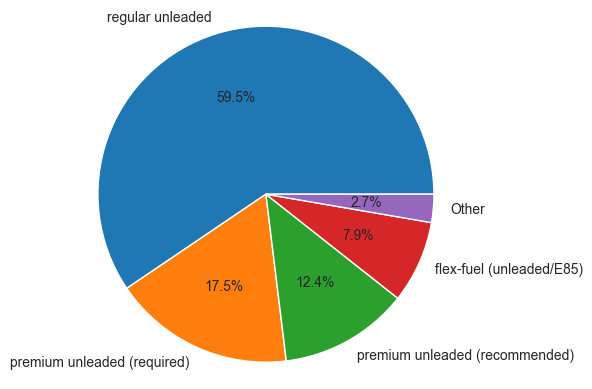

In [1647]:
## Engine Fuel Type , Engine HP , Engine Cylinders ve Number of Doors missing value lar içeriyor.


engine_fuel_type_counts = df['Engine Fuel Type'].value_counts()
threshold = 0.05 
small_categories = engine_fuel_type_counts[engine_fuel_type_counts/len(df) < threshold].index
engine_fuel_type_counts['Other'] = engine_fuel_type_counts[small_categories].sum()
engine_fuel_type_counts.drop(small_categories, inplace=True)

plt.pie(engine_fuel_type_counts, labels=engine_fuel_type_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [1648]:
## Engine Fuel Type da sadece 3 boş değer olduğu için bunları 'regular unleaded' olarak doldurabiliriz.
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

In [1649]:
## Engine HP da olan boş değerlerin bir çoğu elektrik arabalar olduğundan HP leri 0 olarak doldurulabilir.
df['Engine HP'].fillna(0,inplace=True)

In [1650]:
## Engine Cylinder da olan boş değerleri eğer araba elektrikli ise 0 olarak doldurdum. Elektrikli olmayan diğer arabaları dropladım.
df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = 0
df.dropna(subset=['Engine Cylinders'], inplace=True)

In [1651]:
## Number of Doors da olan boş değerleri 4 olarak dolduruldu.
df['Number of Doors'].fillna(4, inplace=True)

In [1652]:
## Missing value işlemi tamamlandı.
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [1653]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [1654]:
categorical_cols

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [1655]:
numeric_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

<a id="2"></a>

EDA

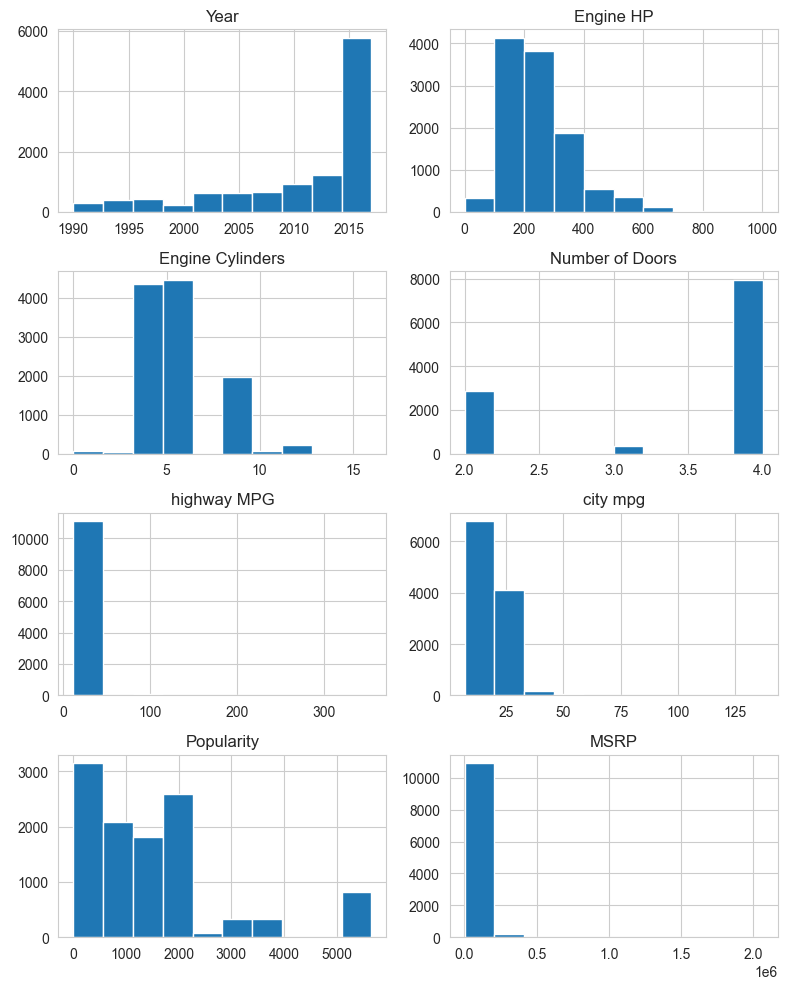

In [1656]:
num_plots = len(numeric_cols)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 10))

for i, col in enumerate(numeric_cols):
    row = i // num_cols
    col_num = i % num_cols
    axs[row, col_num].hist(df[col])
    axs[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

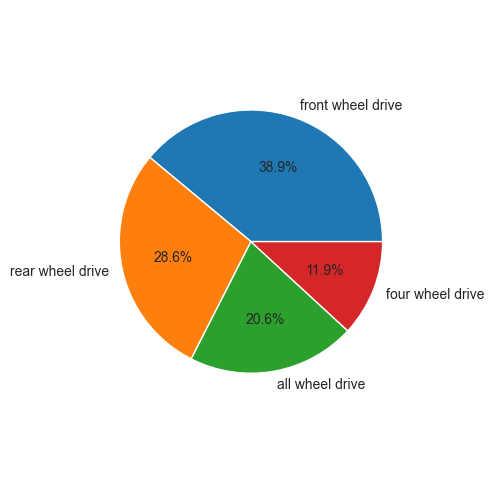

In [1657]:
## En çok front wheel drive mevcut.
Driven_Wheels_counts = df['Driven_Wheels'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(Driven_Wheels_counts, labels=Driven_Wheels_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.tight_layout()
plt.show()

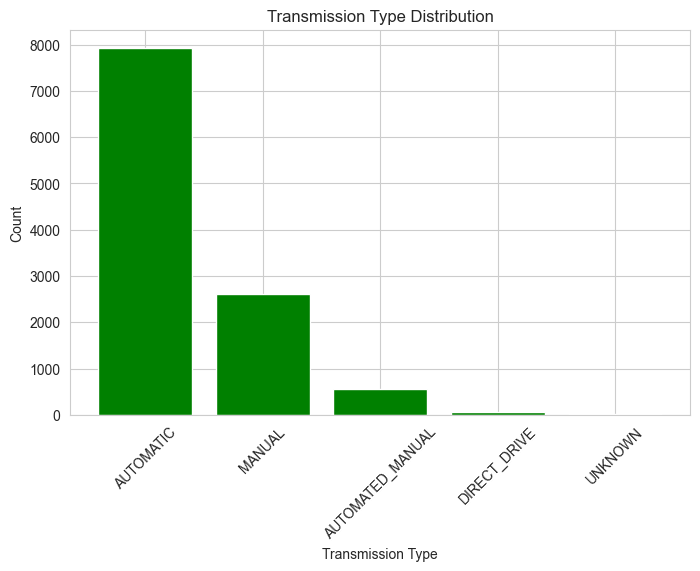

In [1658]:
# Verideki arabaların çoğunluğunun otomatik tipte olduğunu belirtiyor
transmission_counts = df['Transmission Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(transmission_counts.index, transmission_counts.values, color='green')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Transmission Type Distribution')
plt.xticks(rotation=45)  
plt.show()

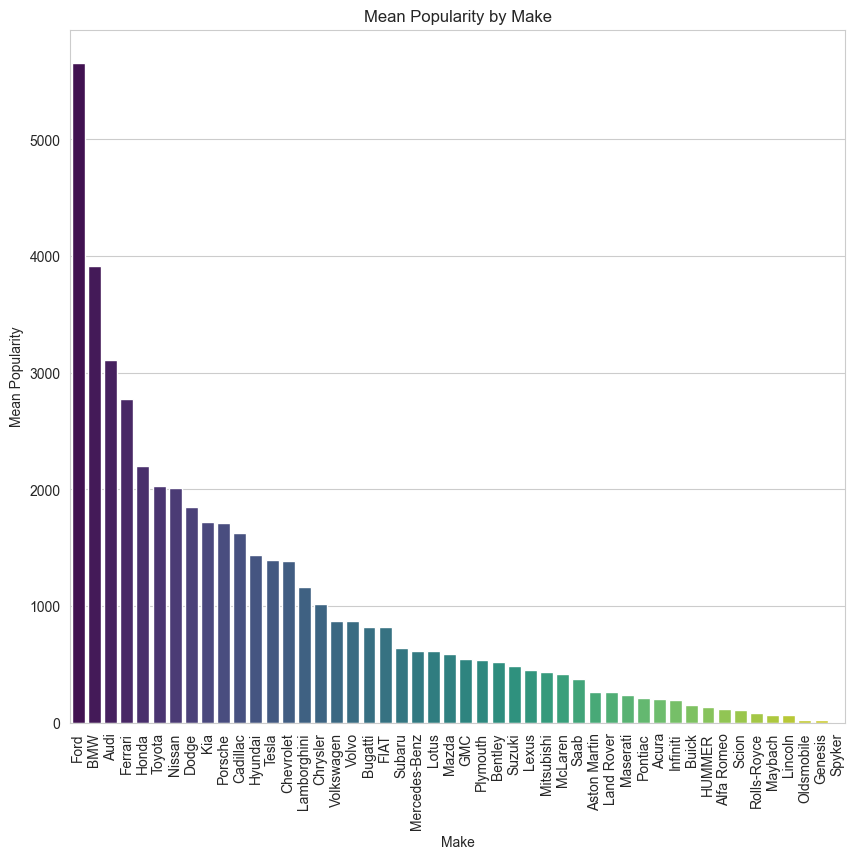

In [1659]:
# Make ve Popularity sütunlarını gruplayıp ortalama değerleri hesapla
make_popularity_mean = df.groupby('Make')['Popularity'].mean()
make_popularity_mean_sorted = make_popularity_mean.sort_values(ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x=make_popularity_mean_sorted.index, y=make_popularity_mean_sorted.values, palette='viridis')
plt.title('Mean Popularity by Make')
plt.xlabel('Make')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=90) 
plt.show()

--Belirgin olarak, Ford en yüksek çubuğa sahiptir, bu da listedeki tüm markalar arasında en yüksek ortalama popülerliğe sahip olduğunu gösterir.

--BMW, Honda, Toyota, Nissan, Dodge ve Chevrolet gibi diğer otomobil markaları, nispeten yüksek ortalama popülerliklere sahiptir. 

--Rolls-Royce ve Lamborghini gibi lüks markalar, daha düşük ortalama popülerlikleri işaret ederek listede daha gerilerdedir.

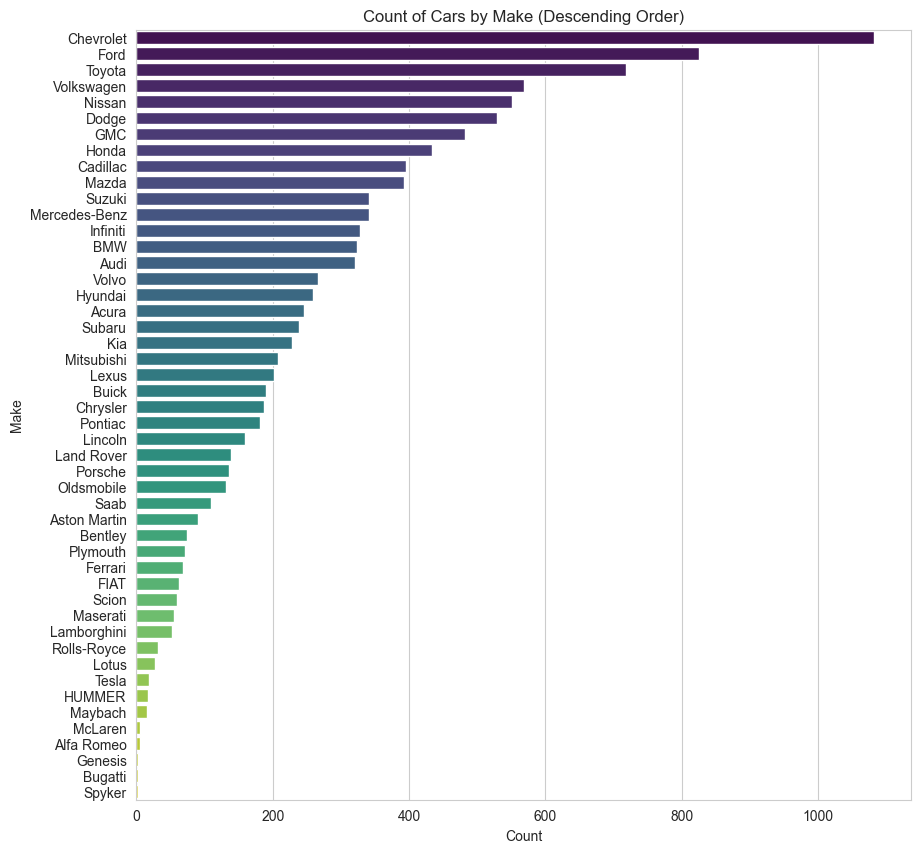

In [1660]:
## Ortalama fiyatlarla en fazla veri setine sahip otomobil modelleri : Chervolet,Ford,Toyota,Nissan,Volkswagen

count_by_make = df['Make'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.countplot(data=df, y='Make', palette='viridis', order=count_by_make.index)
plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Count of Cars by Make (Descending Order)')
plt.show()

Özellikle, en yüksek sayıya sahip üç marka şunlardır:
Chevrolet
Ford
Toyota
Popülerlik ve Yaygınlık:
Grafik, bu araba markalarının popülerliğini veya yaygınlığını vurgulamaktadır.
Rolls-Royce, Maybach ve McLaren gibi lüks markaların bazıları en düşük sayılara sahiptir, bu da onların özel olduklarını göstermektedir.

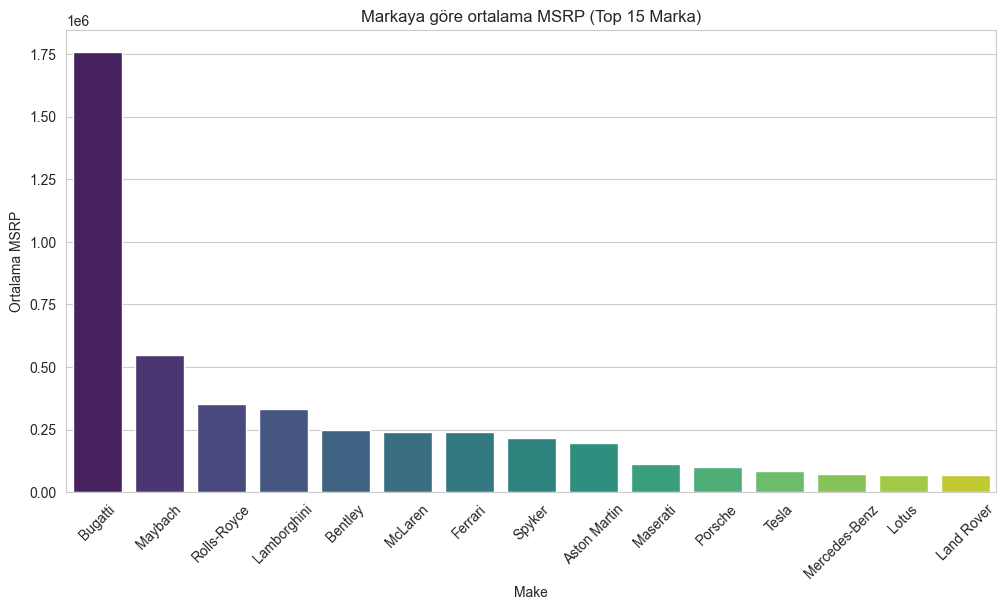

In [1661]:
# 'Make' sütununa göre 'MSRP' sütununun ortalama değerlerini hesapla
make_msrp_mean = df.groupby('Make')['MSRP'].mean().reset_index()
make_msrp_mean_sorted = make_msrp_mean.sort_values(by='MSRP', ascending=False)
max_make_count = 15
make_msrp_mean_sorted_limited = make_msrp_mean_sorted.head(max_make_count)

plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='MSRP', data=make_msrp_mean_sorted_limited, palette='viridis')
plt.title(f'Markaya göre ortalama MSRP (Top {max_make_count} Marka)')
plt.xlabel('Make')
plt.ylabel('Ortalama MSRP')
plt.xticks(rotation=45) 
plt.show()

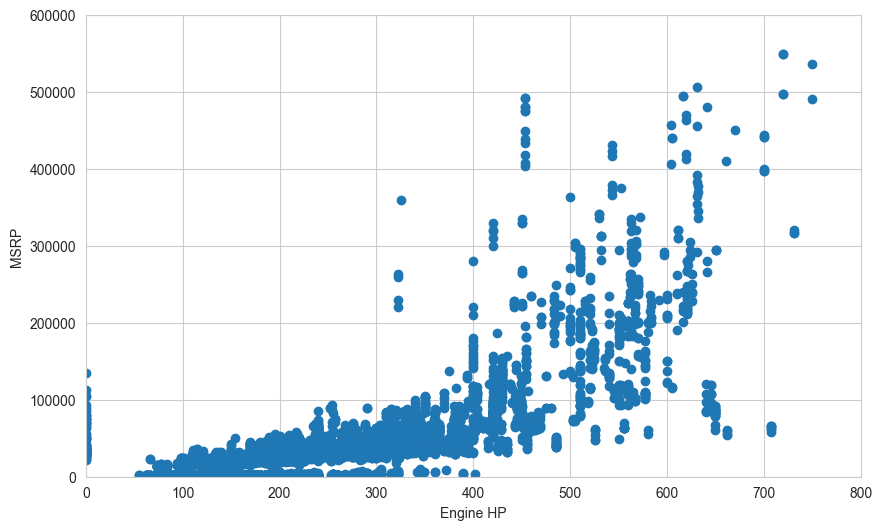

In [1662]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Engine HP'], df['MSRP'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.xlim(0,800)
plt.ylim(0, 0.6e6)
plt.show()

In [1663]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11179.0,2010.720279,7.229331,1990.0,2007.0,2015.0,2016.0,2017.0
Engine HP,11179.0,251.869487,111.680720,0.0,170.0,237.0,303.0,1001.0
Engine Cylinders,11179.0,5.660882,1.804187,0.0,4.0,6.0,6.0,16.0
Number of Doors,11179.0,3.453976,0.873000,2.0,2.0,4.0,4.0,4.0
highway MPG,11179.0,26.617944,8.983958,12.0,22.0,25.0,30.0,354.0
city mpg,11179.0,19.738796,9.184279,7.0,16.0,18.0,22.0,137.0
Popularity,11179.0,1560.223186,1446.375732,2.0,549.0,1385.0,2009.0,5657.0
MSRP,11179.0,41953.536005,61585.661186,2000.0,21599.0,30695.0,43100.0,2065902.0


Scatter grafiği, Motor Beygir Gücü (Engine HP) ile Üretici Önerilen Perakende Fiyatı (MSRP) arasında pozitif bir korelasyonu göstermektedir.
Motor beygir gücü arttıkça, arabanın fiyatı da genellikle yükselir.
Ancak, özellikle daha düşük beygir güç seviyelerinde, fiyatın önemli ölçüde değiştiği birkaç aykırı değer bulunmaktadır.
Elektrikli arabaların HP leri 0 olarak gösterilmiştir.

<a id="3"></a>

In [1664]:
numeric_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

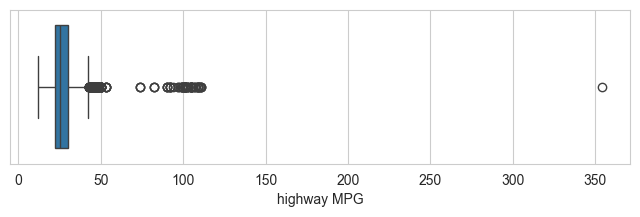

In [1665]:
plt.figure(figsize = (8,2))
sns.boxplot(x=df['highway MPG'])
plt.show()

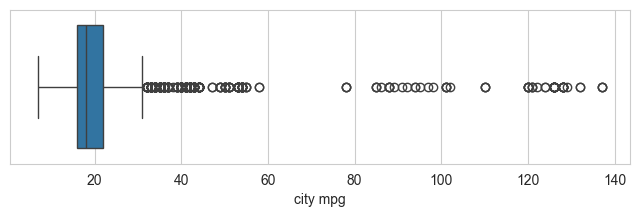

In [1666]:
plt.figure(figsize = (8,2))
sns.boxplot(x=df['city mpg'])
plt.show()

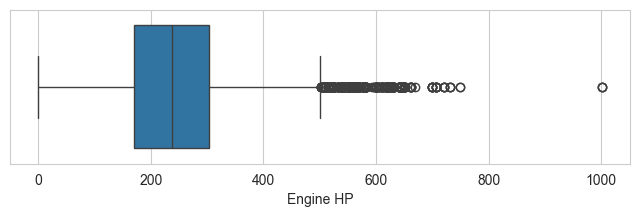

In [1667]:
## 500 ün üzerinde olan hp outlier
plt.figure(figsize = (8,2))
sns.boxplot(x=df['Engine HP'])
plt.show()

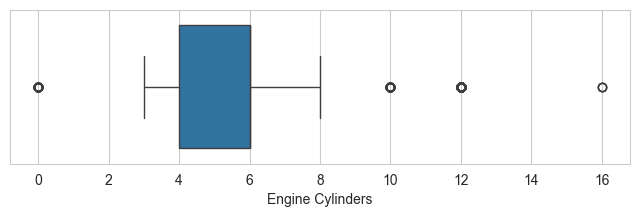

In [1668]:
## 3 ün altında ve 8 in üstüne olan silindir sayıları outlier
plt.figure(figsize = (8,2))
sns.boxplot(x=df['Engine Cylinders'])
plt.show()

In [1669]:
## Önerilen satış fiyatı 2000 den düşük ve 75.3K dan yüksek olanlar outlier. Detalyarı görebilmek için plotly kullandım.
fig = px.box(df, x='MSRP')
fig.show()

In [1670]:
## Outlier silme işlemi
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_with_outliers = ['Engine HP', 'Engine Cylinders', 'MSRP','city mpg','highway MPG']  # Outlier'ları sileceğim sütunlar
df = remove_outliers_iqr(df, columns_with_outliers)

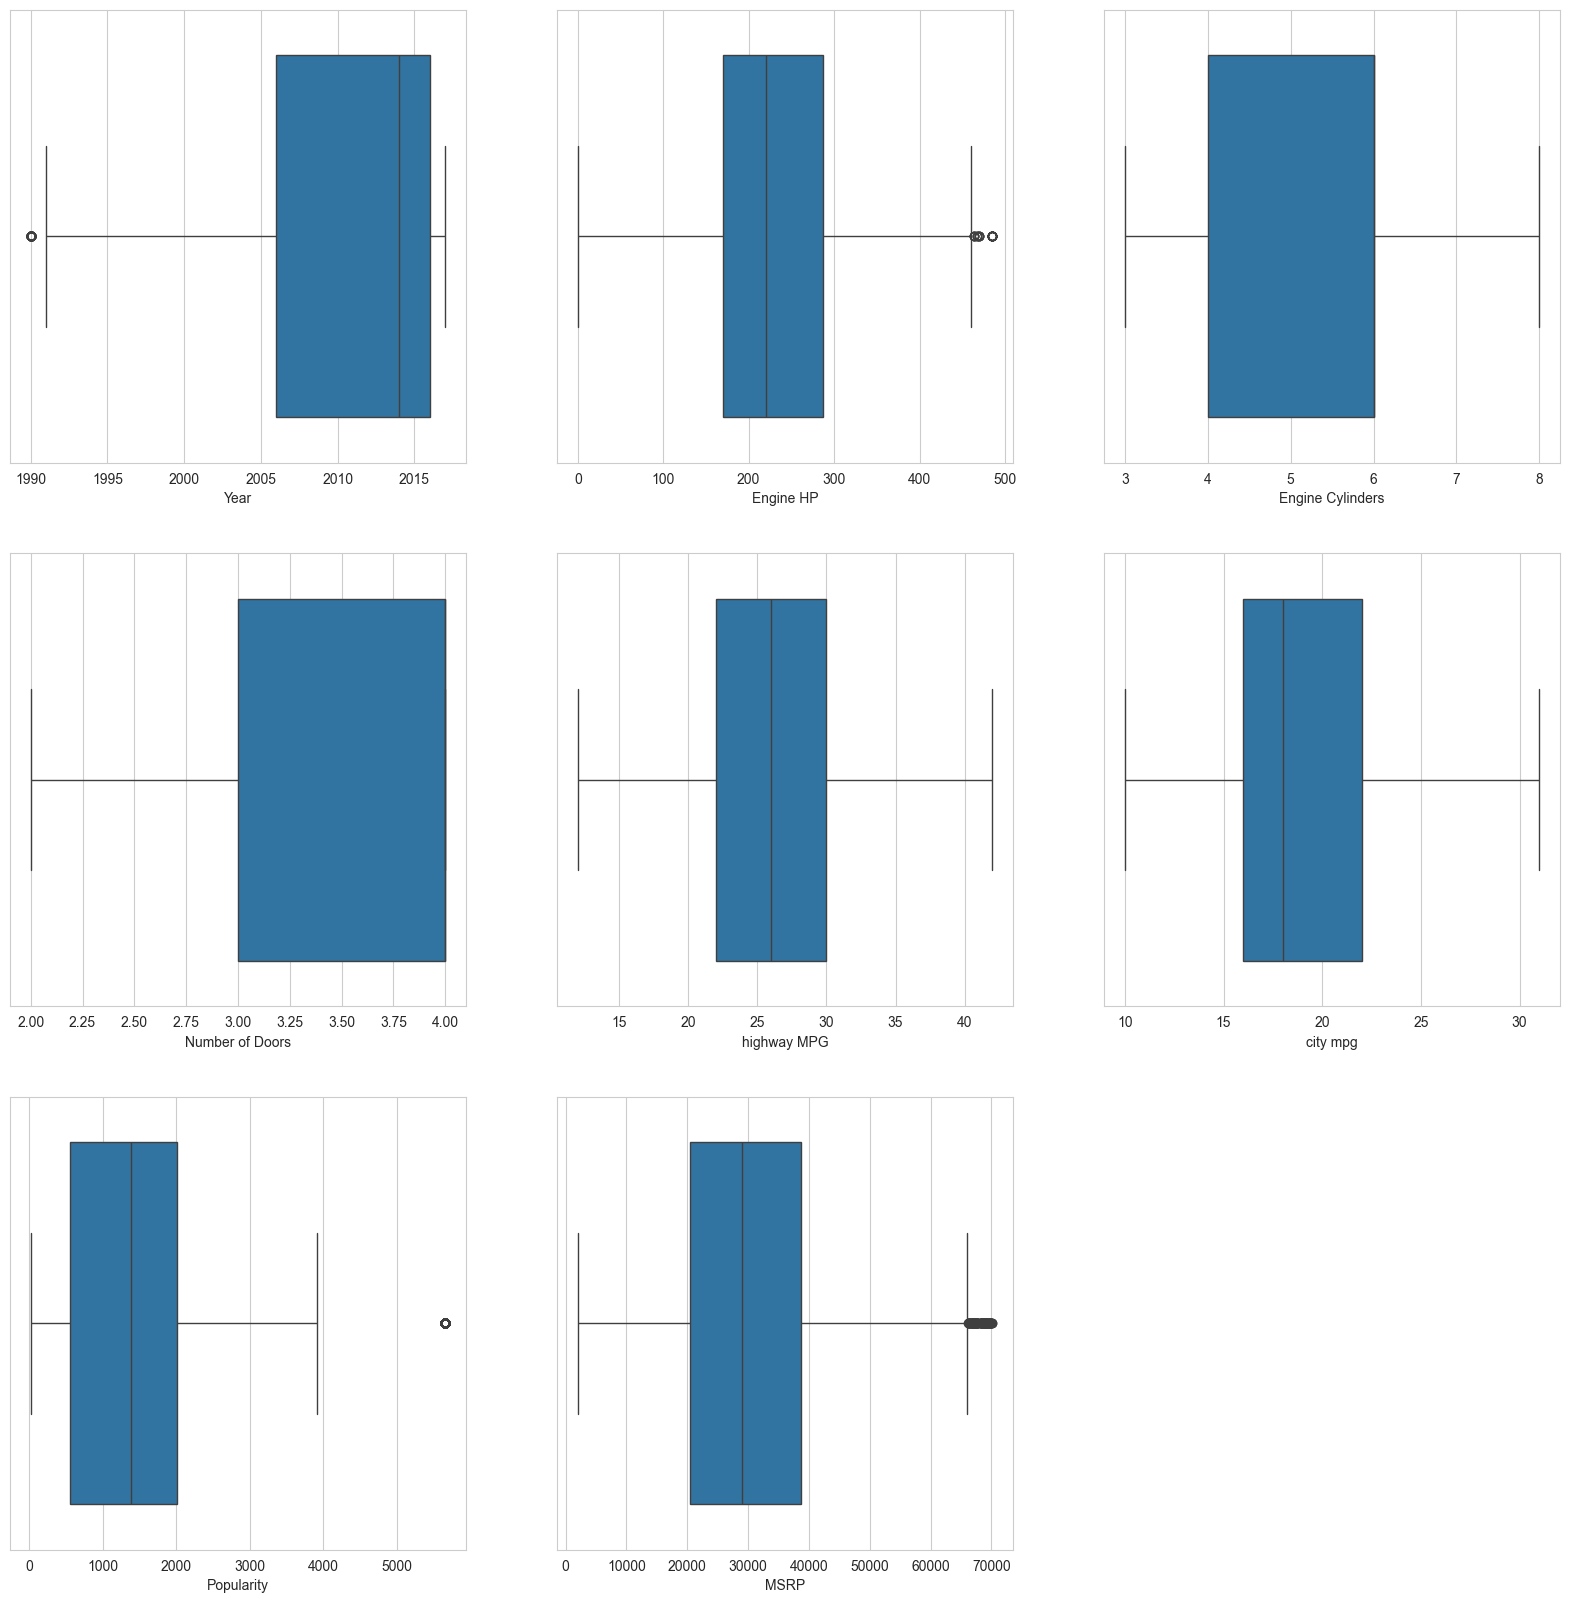

In [1671]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

num_cols = len(numeric_cols)
for i in range(num_cols):
    j = i // 3
    k = i % 3
    sns.boxplot(x=df[numeric_cols[i]], ax=ax[j, k])


if num_cols < 9:
    ax[-1, -1].remove()

OUTLIER silme işleminden sonra boxplotlar kontrol edildi.

In [1672]:
numeric_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [1673]:
##Feature Engineering

# Güç/Ağırlık Oranı
df['Power_to_Weight_Ratio'] = df['Engine HP'] / df['Engine Cylinders']

# Yakıt Ekonomisi
df['Average_MPG'] = (df['highway MPG'] + df['city mpg']) / 2

# MSRP'nin Logaritması
df['Log_MSRP'] = np.log(df['MSRP'])



In [1674]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Güç/ağırlık oranı, motor beygir gücünün silindir sayısına bölünmesiyle hesaplanır.

Yakıt ekonomisi, şehir içi ve şehirlerarası yakıt tüketim değerlerinin ortalamasını alarak hesaplanır.

MSRP'nin logaritması, fiyatın logaritması alınarak fiyat dağılımını daha normal bir şekle dönüştürür.

<a id="4"></a>

In [1675]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Power_to_Weight_Ratio,Average_MPG,Log_MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,55.833333,22.5,10.739327
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,50.000000,23.5,10.612754
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,50.000000,24.0,10.500949
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,38.333333,23.0,10.290449
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,38.333333,23.0,10.448715


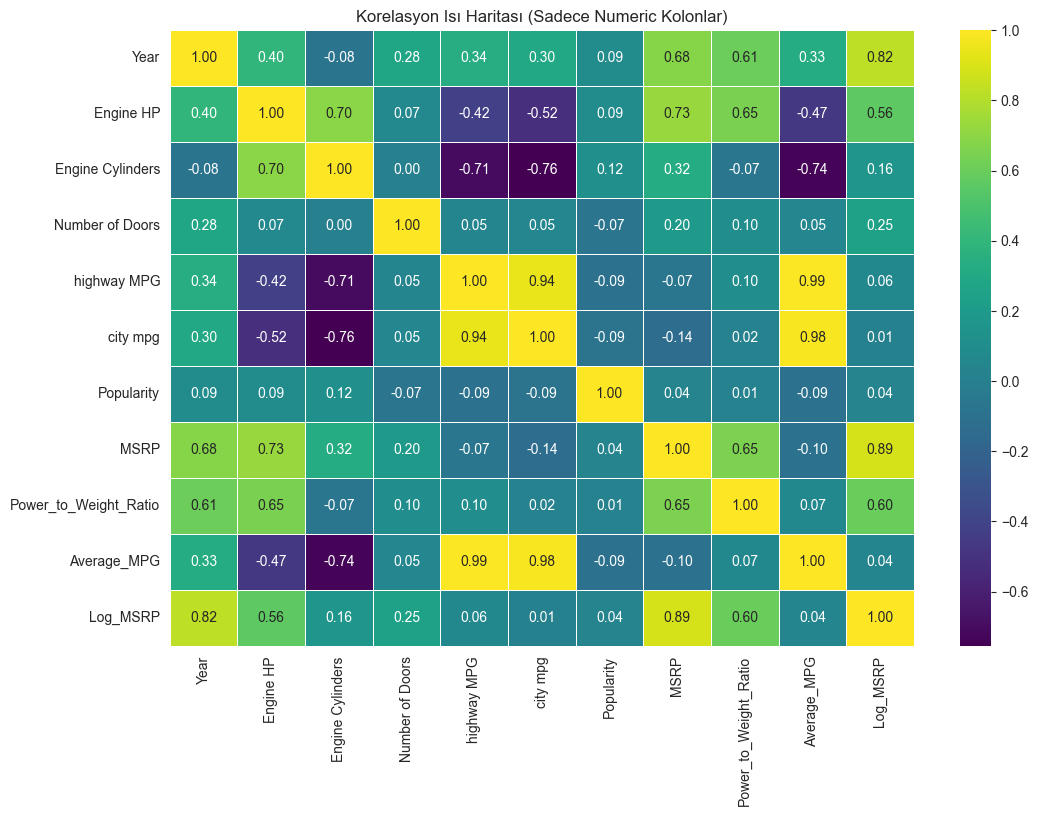

In [1676]:
# Sadece numeric kolonları seç
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini oluştur
correlation_matrix = numeric_df.corr()

# Heatmap çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Isı Haritası (Sadece Numeric Kolonlar)')
plt.show()

-Güçlü Pozitif Korelasyonlar:

"Engine HP":Daha yüksek motor beygir gücüne sahip araçların genellikle daha yüksek bir MSRP'ye sahip olma eğilimi vardır.

"Engine Cylinders": Daha fazla silindir genellikle daha iyi performansı işaret eder, bu da MSRP'yi olumlu yönde etkileyebilir.

"highway MPG" ve "city MPG" arasında 0.94'lük bir korelasyon bulunmaktadır, bu da ikisinin birbirleriyle yüksek derecede ilişkili olduğunu göstermektedir. Bu, her iki değişkenin de yakıt verimliliğini ölçmesi nedeniyle mantıklıdır.

"MSRP" ve "Power_to_Weight_Ratio" arasında 0.65'lik bir korelasyon bulunmaktadır, bu da daha yüksek güç-ağırlık oranına sahip olan arabaların MSRP sinin daha yüksek olduğunu öne sürmektedir.

-Güçlü Negatif Korelasyonlar:

"Engine Cylinders" ve "highway MPG" arasında -0.71'lik bir korelasyon bulunmaktadır, bu da daha fazla motor silindirine sahip araçların genellikle daha düşük otoyol yakıt verimliliğine sahip olduğunu göstermektedir.

"Engine Cylinders" ve "city MPG" arasında -0.76'lık bir korelasyon bulunmaktadır, bu da daha fazla motor silindirine sahip araçların genellikle daha düşük şehir içi yakıt verimliliğine sahip olduğunu öne sürmektedir.

"Number of Doors" ve "highway MPG" arasında -0.4'lük bir korelasyon bulunmaktadır, bu da daha fazla kapıya sahip araçların genellikle daha düşük otoyol yakıt verimliliğine sahip olduğunu göstermektedir.

"City MPG ve Highway MPG" :Yakıt verimliliği (daha yüksek MPG), genellikle MSRP ile negatif olarak ilişkilidir. Yakıt verimli araçlar genellikle daha düşük bir MSRP'ye sahip olabilir.

In [1677]:
numeric_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'Power_to_Weight_Ratio', 'Average_MPG', 'Log_MSRP'],
      dtype='object')

In [1678]:
categorical_cols

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [1679]:
df.Popularity

0        3916
1        3916
2        3916
3        3916
4        3916
         ... 
11909     204
11910     204
11911     204
11912     204
11913      61
Name: Popularity, Length: 9786, dtype: int64

In [1680]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error

In [1681]:
numeric_df = df[numeric_cols]

In [1682]:
numeric_df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Power_to_Weight_Ratio,Average_MPG,Log_MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135,55.833333,22.5,10.739327
1,2011,300.0,6.0,2.0,28,19,3916,40650,50.000000,23.5,10.612754
2,2011,300.0,6.0,2.0,28,20,3916,36350,50.000000,24.0,10.500949
3,2011,230.0,6.0,2.0,28,18,3916,29450,38.333333,23.0,10.290449
4,2011,230.0,6.0,2.0,28,18,3916,34500,38.333333,23.0,10.448715
...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,50.000000,19.5,10.739002
11910,2012,300.0,6.0,4.0,23,16,204,56670,50.000000,19.5,10.945000
11911,2012,300.0,6.0,4.0,23,16,204,50620,50.000000,19.5,10.832102
11912,2013,300.0,6.0,4.0,23,16,204,50920,50.000000,19.5,10.838011


<a id="5"></a>

In [1683]:
categorical_cols

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [1684]:
cat_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
df = pd.get_dummies(df, columns = cat_features, dtype=int)

In [1685]:
df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Power_to_Weight_Ratio,Average_MPG,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,55.833333,22.5,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,50.000000,23.5,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,50.000000,24.0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,38.333333,23.0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,38.333333,23.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,50.000000,19.5,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,50.000000,19.5,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,50.000000,19.5,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,50.000000,19.5,...,0,0,0,0,0,0,0,0,0,0


<a id="6"></a>

In [1686]:
X = numeric_df.drop(columns=['MSRP', 'Average_MPG', 'Log_MSRP','Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'])  
y = numeric_df['MSRP']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [1687]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [1688]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
train_mae = mean_absolute_error(y_val, y_pred)
train_mse = mean_squared_error(y_val, y_pred)
train_r2 = r2_score(y_val, y_pred)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", train_mae)
print("Ortalama Kare Hata (MSE):", train_mse)
print("R-kare:", train_r2)

Eğitim Seti:
Ortalama Mutlak Hata (MAE): 6282.6365690558605
Ortalama Kare Hata (MSE): 67199775.4165516
R-kare: 0.7294296025236457


In [1689]:
##sns.scatterplot(x=X_val.index, y=y_val, color='blue', label='Gerçek Değerler')
##sns.scatterplot(x=X_val.index, y=y_pred, color='red', label='Tahminler')

In [1690]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10)  # Example hyperparameters
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", mae_rf)
print("Ortalama Kare Hata (MSE):", mse_rf)
print("R-kare:", train_r2)

Eğitim Seti:
Ortalama Mutlak Hata (MAE): 3524.852161604093
Ortalama Kare Hata (MSE): 28688816.672877748
R-kare: 0.7294296025236457


In [1691]:
##sns.scatterplot(x=X_val.index, y=y_val, color='blue', label='Gerçek Değerler')
##sns.scatterplot(x=X_val.index, y=y_pred_rf, color='red', label='Tahminler')

In [1692]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)
y_pred_xgb = xgb_model.predict(X_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", mae_xgb)
print("Ortalama Kare Hata (MSE):", mse_xgb)
print("R-kare:", train_r2)


Eğitim Seti:
Ortalama Mutlak Hata (MAE): 3456.855856843818
Ortalama Kare Hata (MSE): 27164201.966376375
R-kare: 0.7294296025236457


In [1693]:
##sns.scatterplot(x=X_val.index, y=y_val, color='blue', label='Gerçek Değerler')
##sns.scatterplot(x=X_val.index, y=y_pred_xgb, color='red', label='Tahminler')

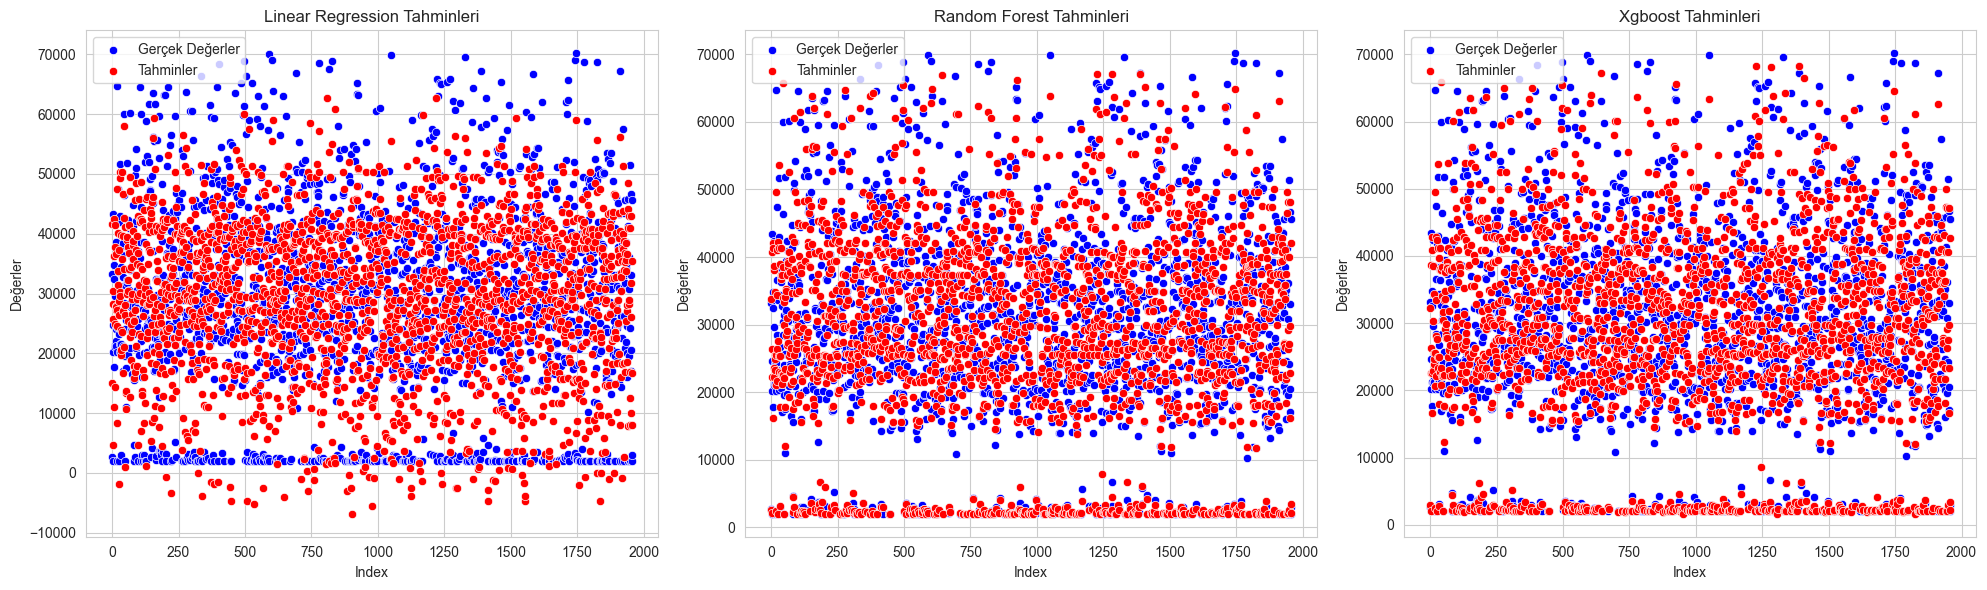

In [1694]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# İlk subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[0])
sns.scatterplot(x=range(len(y_val)), y=y_pred, color='red', label='Tahminler', ax=axs[0])
axs[0].set_title('Linear Regression Tahminleri')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Değerler')
axs[0].legend()

# İkinci subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[1])
sns.scatterplot(x=range(len(y_val)), y=y_pred_rf, color='red', label='Tahminler', ax=axs[1])
axs[1].set_title('Random Forest Tahminleri')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Değerler')
axs[1].legend()

# Üçüncü subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[2])
sns.scatterplot(x=range(len(y_val)), y=y_pred_xgb, color='red', label='Tahminler', ax=axs[2])
axs[2].set_title('Xgboost Tahminleri')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Değerler')
axs[2].legend()

plt.tight_layout()
plt.show()

In [1695]:
X = df.drop(columns=['MSRP','Log_MSRP'])  
y = df['MSRP']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [1696]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
train_mae = mean_absolute_error(y_val, y_pred)
train_mse = mean_squared_error(y_val, y_pred)
train_r2 = r2_score(y_val, y_pred)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", train_mae)
print("Ortalama Kare Hata (MSE):", train_mse)
print("R-kare:", train_r2)

Eğitim Seti:
Ortalama Mutlak Hata (MAE): 2449.6383762289825
Ortalama Kare Hata (MSE): 12212097.63432363
R-kare: 0.9508297149736434


In [1697]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10)  
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
train_r2 = r2_score(y_val, y_pred_rf)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", mae_rf)
print("Ortalama Kare Hata (MSE):", mse_rf)
print("R-kare:", train_r2)

Eğitim Seti:
Ortalama Mutlak Hata (MAE): 2644.1610381132014
Ortalama Kare Hata (MSE): 14517682.427820208
R-kare: 0.9415466036816055


In [1698]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)
y_pred_xgb = xgb_model.predict(X_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
train_r2 = r2_score(y_val, y_pred_xgb)
print("Eğitim Seti:")
print("Ortalama Mutlak Hata (MAE):", mae_xgb)
print("Ortalama Kare Hata (MSE):", mse_xgb)
print("R-kare:", train_r2)

Eğitim Seti:
Ortalama Mutlak Hata (MAE): 2178.4490536620597
Ortalama Kare Hata (MSE): 9259967.34708241
R-kare: 0.962716050311367


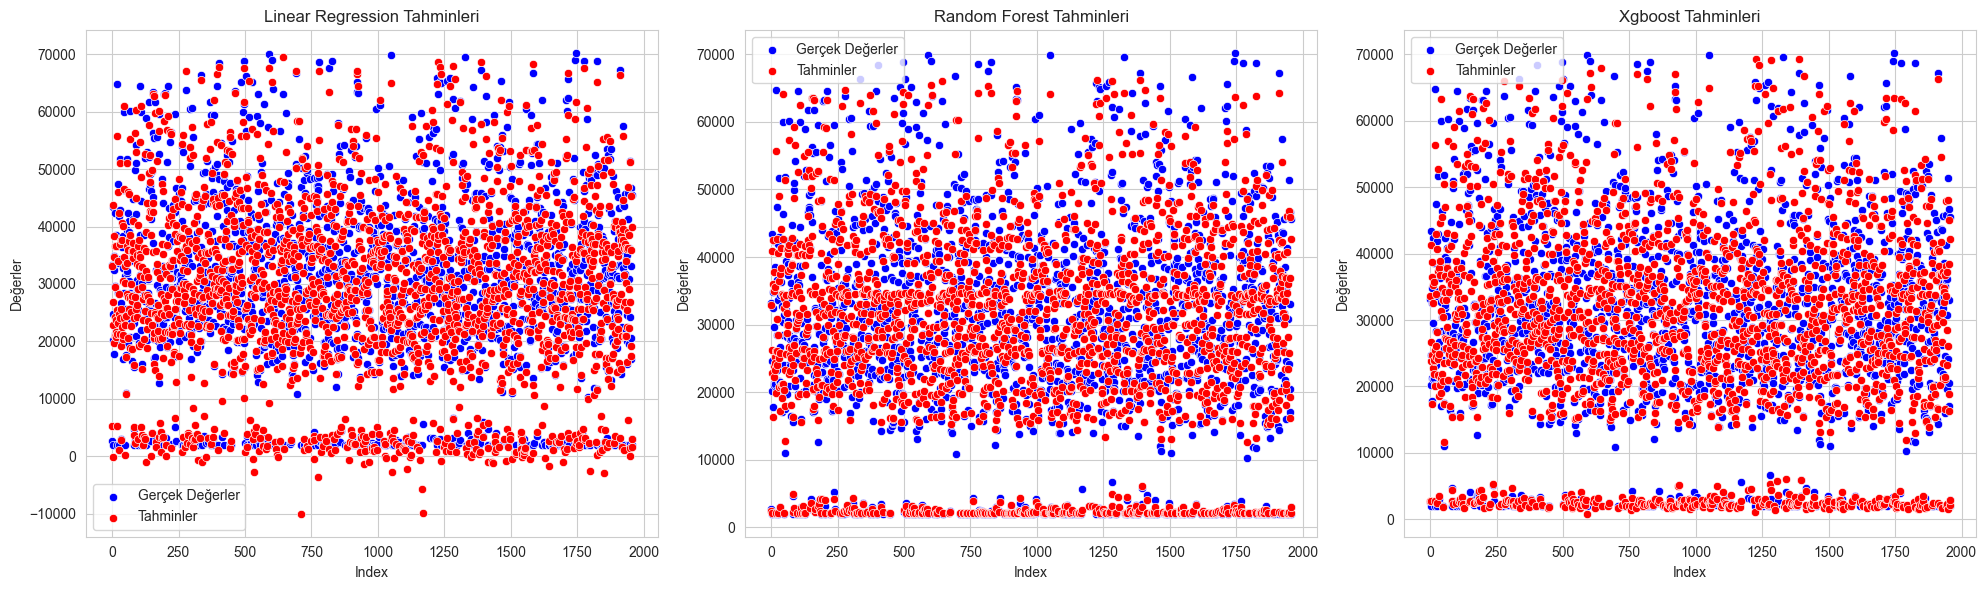

In [1699]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# İlk subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[0])
sns.scatterplot(x=range(len(y_val)), y=y_pred, color='red', label='Tahminler', ax=axs[0])
axs[0].set_title('Linear Regression Tahminleri')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Değerler')
axs[0].legend()

# İkinci subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[1])
sns.scatterplot(x=range(len(y_val)), y=y_pred_rf, color='red', label='Tahminler', ax=axs[1])
axs[1].set_title('Random Forest Tahminleri')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Değerler')
axs[1].legend()

# Üçüncü subplot
sns.scatterplot(x=range(len(y_val)), y=y_val, color='blue', label='Gerçek Değerler', ax=axs[2])
sns.scatterplot(x=range(len(y_val)), y=y_pred_xgb, color='red', label='Tahminler', ax=axs[2])
axs[2].set_title('Xgboost Tahminleri')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Değerler')
axs[2].legend()

plt.tight_layout()
plt.show()

Sonuç olarak XGboost en yüksek R-Kare sonucu ile en iyi model olarak seçildi